In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
visa_df=pd.read_csv(r"C:\Users\Almannan\OneDrive\NareshIT\DSAIML\DataFiles\Visadataset.csv")
visa_df


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**Outliers Analysis of Number of Employees**

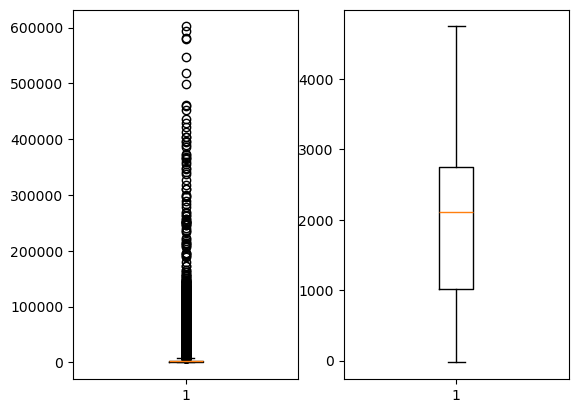

In [7]:
ol=[]
q1=round(np.percentile(visa_df['no_of_employees'],25),2)
q3=round(np.percentile(visa_df['no_of_employees'],75),2)
median=visa_df['no_of_employees'].median()
iqr=q3-q1

lb=q1-1.5*iqr
ub=q1+1.5*iqr
con1=visa_df['no_of_employees']<lb
con2 = visa_df['no_of_employees']>ub
con=con1|con2
ol= np.where(con, median,visa_df['no_of_employees'])

visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees']=ol
plt.subplot(1,2,1).boxplot(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'])
plt.show()